In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Read Data

In [3]:
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data cleaning

In [4]:
print(data.duplicated().sum())
data.drop_duplicates(inplace = True)

1081


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

<Axes: title={'center': 'Class'}>

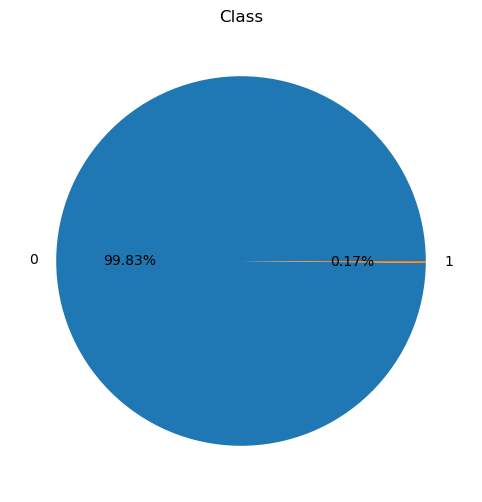

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,6))
data['Class'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Class')

In [8]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

# Split Data into 75% - 25%

In [11]:
from sklearn.model_selection import train_test_split
x = data.drop(['Class'], axis = 1)
y = data['Class']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 42)
x_train[:5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
12490,21876.0,0.688618,-0.822579,0.898360,0.737250,-0.801228,0.685497,-0.651980,0.342440,1.711003,...,0.157386,0.063451,-0.063368,-0.045120,-0.353307,-0.175701,0.377738,-0.052908,0.036327,215.00
34872,37863.0,-1.093749,1.021302,1.263211,-0.967866,-0.122500,0.554127,-0.842832,-2.479357,0.180269,...,0.739965,-1.229363,0.818690,-0.138811,-0.515225,-0.070506,1.033592,0.278927,0.200193,15.99
221780,142700.0,1.958631,-0.608854,-0.338081,0.318844,-0.742376,-0.042969,-0.866790,0.208547,1.227744,...,-0.263216,0.181981,0.659648,0.134795,-0.373369,-0.327587,0.578986,-0.028705,-0.063657,9.19
273685,165654.0,1.767196,0.251674,-0.223036,3.258201,1.086003,2.703686,-0.713783,0.726881,-0.852586,...,-0.250628,-0.108248,-0.204790,0.451670,-1.008504,-0.662697,-0.302633,0.057914,-0.044046,0.79
179738,124221.0,1.871251,0.115794,-2.004520,1.081772,0.887126,-0.640529,0.814612,-0.337673,-0.557538,...,-0.036001,0.233055,0.574186,-0.061234,0.729226,0.440975,-0.545853,-0.047720,-0.050960,85.68


# Scaling data

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
msc = MinMaxScaler()
x_train = msc.fit_transform(x_train)
x_test = msc.fit_transform(x_test)

# Logistic regression 

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)
yhat = lr.predict(x_test)
print(lr.score(x_test , y_test))

0.9987734731855862


In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy score: " , accuracy_score(y_test,yhat))
print("Recall score: " ,recall_score(y_test,yhat, average='micro'))
print("Precision score: " ,precision_score(y_test,yhat , average='micro'))
print("F1 score: " ,f1_score(y_test,yhat , average='micro'))

Accuracy score:  0.9987734731855862
Recall score:  0.9987734731855862
Precision score:  0.9987734731855862
F1 score:  0.9987734731855862


# Prediction

In [ ]:
def pred(data , model):
    out = model.predict(data)
    if out == 1: 
        return "Fraud"
    else:
        return "Not Fraud"
di = {}
for i in range(1 , 29):
    x = int(input(f"enter V{i}: "))
    di["V" + str(i)] = x

di = pd.DataFrame(di , index=[0])
print(pred(data , lr))